### Tratamento de dados - Fatores de Virulência.

##### Neste notebook iremos realizar o tratamento dos dados de saída do PathoFact para compreender como se dá os fatores de virulência presentes em BGC`s dos GFCs selecionados como caso de estudo.

In [11]:
# Iremos importar as bibliotecas necessárias
# Para criação do dataframe
import pandas as pd
import glob
import os
import seaborn as sns # essa é a biblioteca mais importante para o tratamento de dados


# Para uso gráfico
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from upsetplot import UpSet

In [12]:
# Defina o caminho para o diretório onde os arquivos .tsv estão localizados
dir_all = ['PathoFact_bgc']

dataframes = []

# Percorre cada diretório e lê todos os arquivos .tsv
for diretorio in dir_all:
    arquivos_tsv = glob.glob(os.path.join(diretorio, '*.tsv'))
    dataframes.extend([pd.read_csv(arquivo, sep='\t') for arquivo in arquivos_tsv])

# Concatena todos os DataFrames em um único DataFrame
virulence_concat = pd.concat(dataframes, ignore_index=True)

In [13]:
# E qual é saída desse dado?
display(virulence_concat)

,ORF,ORF_ID,Virulence_HMM_prediction,Virulence_classifier_prediction,Virulence_prediction,Signal_peptide,Virulence_confidence_level
0,1_1,1,negative,pathogenic,unclassified,N,4: Potential Non-secreted Virulence factor
1,1_2,2,pathogenic,negative,unclassified,N,4: Potential Non-secreted Virulence factor
2,1_3,3,negative,negative,non_pathogenic,Y,-
3,1_4,4,negative,negative,non_pathogenic,N,-
4,1_5,5,negative,negative,non_pathogenic,N,-
...,...,...,...,...,...,...,...
75,1_31,31,negative,negative,non_pathogenic,N,-
76,1_32,32,negative,negative,non_pathogenic,N,-
77,1_33,33,pathogenic,negative,unclassified,N,4: Potential Non-secreted Virulence factor
78,1_34,34,pathogenic,negative,unclassified,N,4: Potential Non-secreted Virulence factor


### Histograma

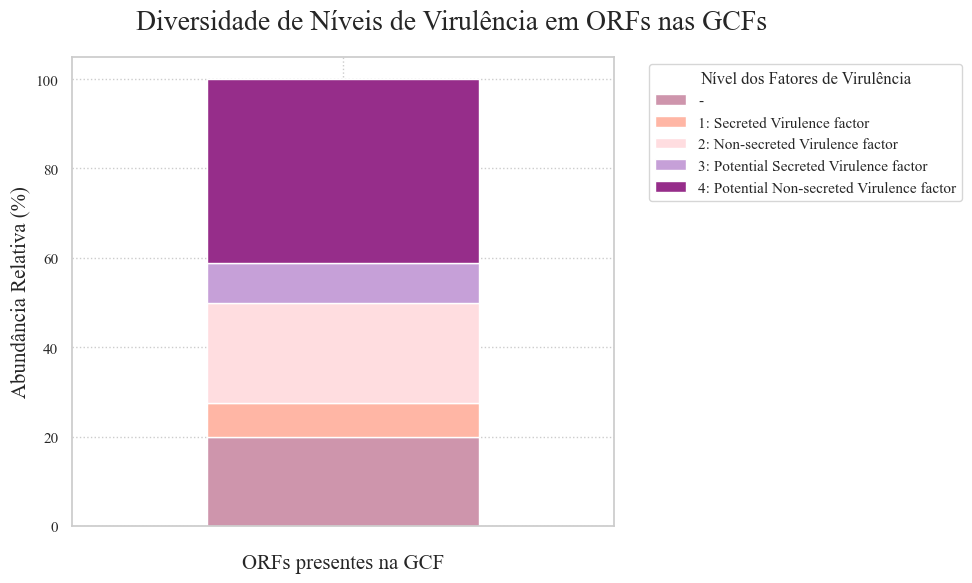

In [15]:
# Configurações de estilo
sns.set_context("notebook")
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['font.family'] = 'Times New Roman'

# Definindo as cores das barras com os códigos hexadecimais
cores_personalizadas = ['#ce95ac', '#ffb6a5', '#ffdde0', '#c6a0d8', '#962d8a']

# Passo 1: Contar a ocorrência de cada nível de confiança de virulência
class_counts = virulence_concat['Virulence_confidence_level'].value_counts().sort_index()

# Passo 2: Calcular a abundância relativa
class_relative_abundance = (class_counts / class_counts.sum()) * 100

# Passo 3: Criar um DataFrame para o gráfico
class_relative_abundance_df = pd.DataFrame(class_relative_abundance).transpose()

# Passo 4: Plotar as barras empilhadas com cores personalizadas
fig, ax = plt.subplots(figsize=(10, 6))
class_relative_abundance_df.plot(kind='bar', stacked=True, color=cores_personalizadas, ax=ax)

# Ajustar rótulos e título
plt.ylabel("Abundância Relativa (%)", fontsize=15)
plt.xlabel("ORFs presentes na GCF", fontsize=15, labelpad=10)
plt.title("Diversidade de Níveis de Virulência em ORFs nas GCFs", fontsize=20, pad=20, x=0.7)

# Remover rótulos do eixo x
ax.set_xticklabels([""])

# Ajustar a posição da legenda e a margem superior para centralizar o título
plt.legend(title='Nível dos Fatores de Virulência', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(top=0.85)
plt.tight_layout()

# Exibir e salvar o gráfico
plt.savefig("diversidade_virulencia_concatenada.png")
plt.show()